In [99]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly import subplots
import plotly.offline as pyo
import pandas as pd

In [100]:
copper_data = pd.read_csv('ca_c_f_d.csv', index_col=0, parse_dates=True)
copper_data.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
Data,,,,
2015-01-02,6309.0,6309.0,6309.0,6309.0
2015-01-05,6216.0,6216.0,6216.0,6216.0
2015-01-06,6191.0,6191.0,6191.0,6191.0
2015-01-07,6170.0,6170.0,6170.0,6170.0
2015-01-08,6230.5,6230.5,6230.5,6230.5


In [101]:
kghm_data = pd.read_csv('kgh_d.csv', index_col=0, parse_dates=True)
kghm_data.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2015-01-02,102.45,102.83,101.97,102.40,309987
2015-01-05,102.16,102.88,99.91,100.09,479228
2015-01-07,100.53,105.45,99.67,104.89,966372
2015-01-08,105.35,107.15,105.35,107.11,711805
2015-01-09,107.15,107.15,103.87,104.33,563221


In [102]:
table_data = pd.concat([kghm_data['Zamkniecie'], copper_data['Zamkniecie']], axis=1).fillna(method='ffill')
table_data.columns=['KGH', 'Miedź']
table_data.reset_index(inplace=True)
table_data = table_data.astype({"Data":str})
table_data.head()


,Data,KGH,Miedź
0,2015-01-02,102.40,6309.0
1,2015-01-05,100.09,6216.0
2,2015-01-06,100.09,6191.0
3,2015-01-07,104.89,6170.0
4,2015-01-08,107.11,6230.5


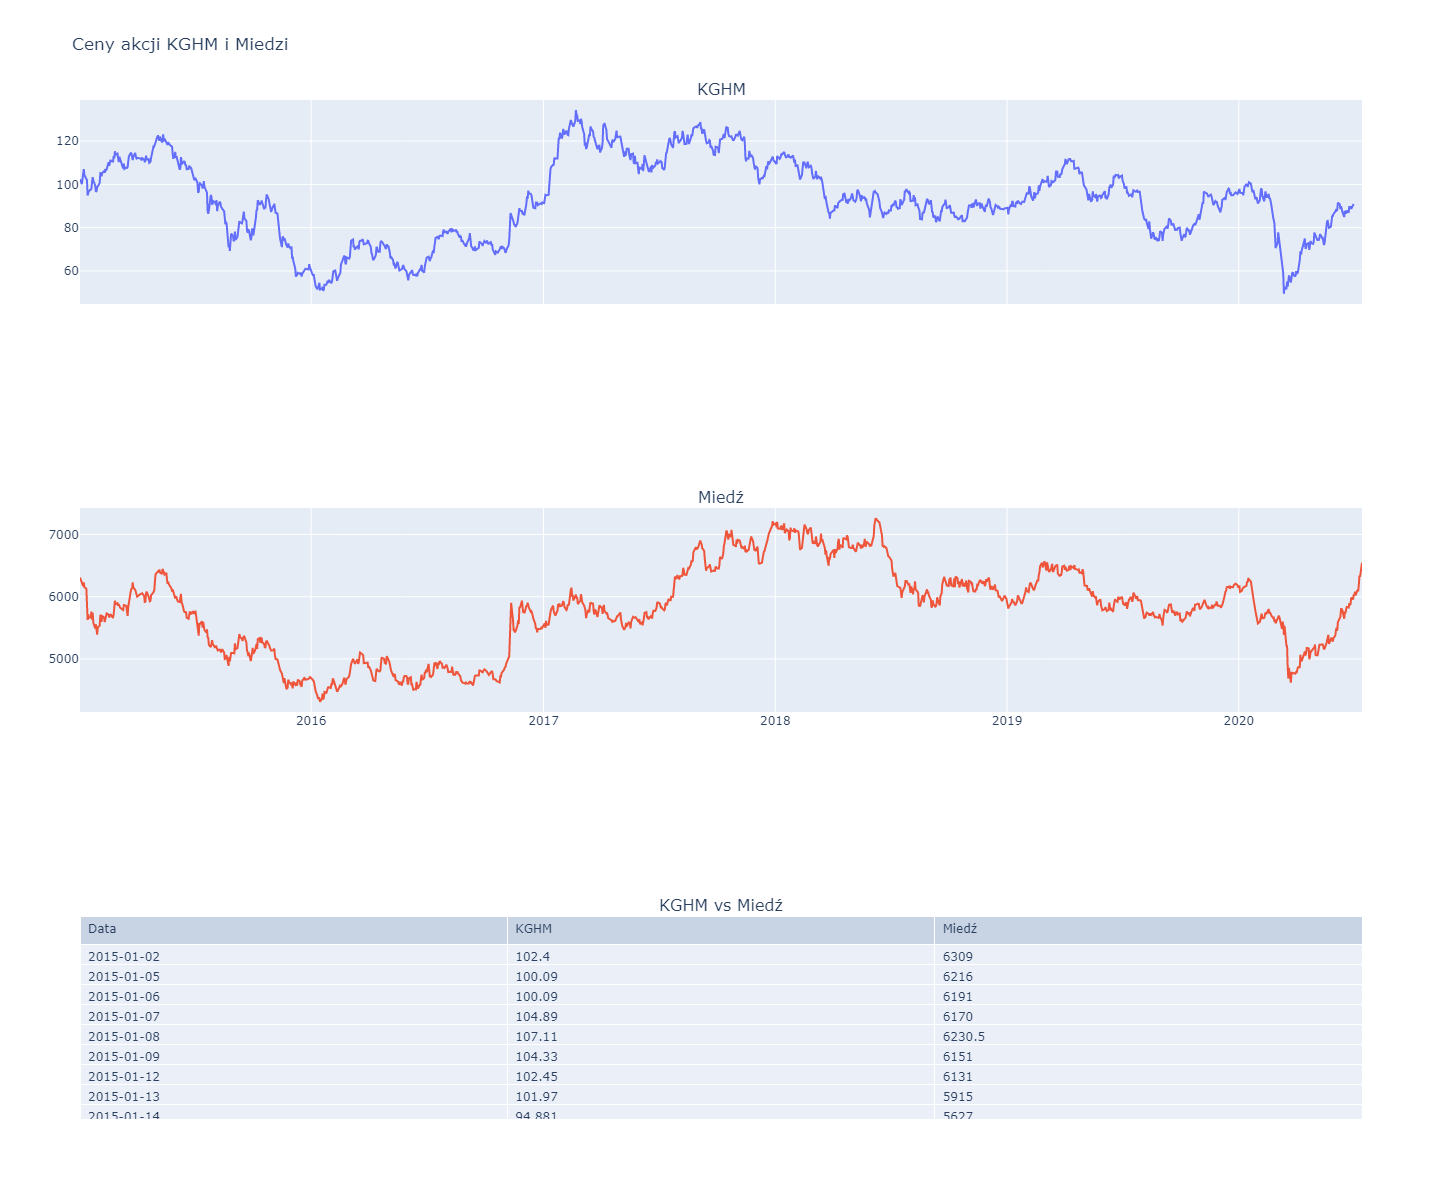

In [103]:
fig = subplots.make_subplots(
    rows=3,
    cols=1,
    shared_xaxes=True,
    subplot_titles=['KGHM', 'Miedź', 'KGHM vs Miedź'],
    vertical_spacing=0.2,
specs=[[{"type": "scatter"}],
       [{"type": "scatter"}],
       [{"type": "table"}]])
fig.add_trace(go.Scatter(x=kghm_data.index,
                         y=kghm_data['Zamkniecie'],
                    ),
             row=1, col=1)
fig.add_trace(go.Scatter(x=copper_data.index,
                         y=copper_data['Zamkniecie']),
             row=2, col=1)
fig.add_trace(go.Table(header=dict( values=["Data", "KGHM", "Miedź"],
                                  align= "left"),
                       cells=dict(values=[table_data[k].tolist() for k in table_data.columns],
                                  align="left")
                      ),
              row=3, col=1)
fig.update_layout(height=1200,
                  showlegend=False,
                 title="Ceny akcji KGHM i Miedzi")